<IPython.core.display.Javascript object>


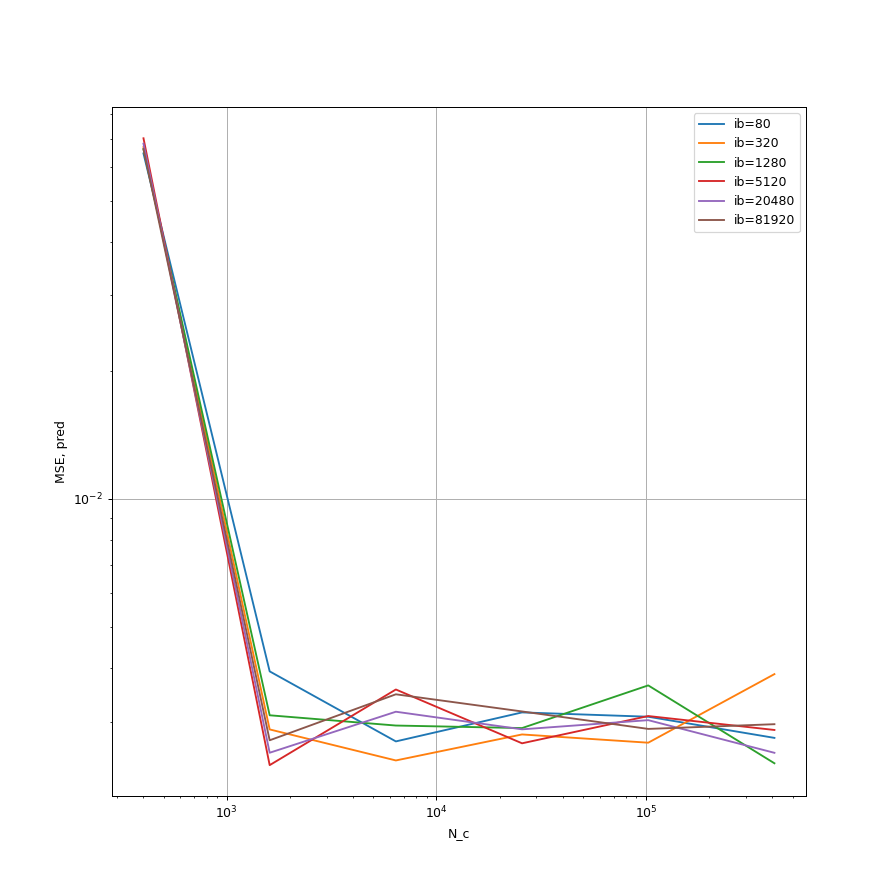

In [2]:
import jax
import jax.numpy as jnp
import numpy as np

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from loss import model
from jaxmeta.data import load_params, tensor_grid

import config
from run import n_ib, n_c
from data import domain

from scipy.io import loadmat
data_true = loadmat("epsilon_1e-12.mat")
u_true, v_true, x_test = data_true["u"], data_true["v"], data_true["x"]
t_test = [domain[1, 1]]
xt_test = tensor_grid([x_test, t_test])

errors = np.zeros((len(n_ib), len(n_c)))
for i, b in enumerate(n_ib):
	for j, c in enumerate(n_c):
		path = "models/ib_{}_c_{}/iteration_{}/params.npy".format(i, j, config.iterations)
		params = load_params(path)
		uv_pred = model(params, xt_test)
		errors[i, j] = config.metaloss(u_true, uv_pred[:, 0:1])

# print(errors)
import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 1, figsize = (10, 10))

n_c_ = [c["cx"]*c["ct"] for c in n_c]
for i, b in enumerate(n_ib):
	plt.loglog(n_c_, errors[i, :], label = "ib={}".format(b["i"]+b["b"]))
plt.xlabel("N_c")
plt.ylabel("MSE, pred")
plt.legend()
plt.grid()
plt.show()